## Introduction

### 机器学习的定义与分类

机器学习研究如何从数据中学习其隐藏的模式并预测未知数据的特征。

根据预测变量是否已知，机器学习通常分为两类：**监督学习**和**无监督学习**。
 
- 监督学习

模型通过特征和类别标签作为构建模型的输入。如果目标变量（要预测的变量）是类别信息（例如正/负），该问题称为分类问题。如果目标变量是连续的（例如身高）则为回归问题。

- 无监督学习

目标变量是未指定的。模型的目的是确定内部数据的结构（cluster）。在模型拟合之后，我们可以将新来的样本分给cluster或生成与原始数据具有相似分布的样本。无监督学习也可以用于监督学习之前的数据预处理步骤。

### 本章教程使用指南
读者将会发现，机器学习的核心模型已经被**scikit-learn**等工具包非常好的模块化了，调用起来非常简单，仅需要几行代码，但是一个完整的、有效的机器学习工程项目却包括很多步骤，可以包括**数据导入，数据可视化理解，前处理，特征选择，模型训练，参数调整，模型预测，模型评估，后处理**等多个步骤，一个在真实世界中有效的模型可能需要工作者对数据的深入理解，以选择各个步骤合适的方法。

通过本章教程，读者可以对机器学习的基本概念方法和具体流程有所了解，而且可以通过实践更好地掌握python相关工具包的使用，为后续的应用做好准备。

读者初次阅读和进行代码实践时，可以将重点放在对方法和概念的理解上，对于一些稍微复杂的代码，不需要理解代码里的每个细节。

## 导入数据

基于数据格式的多样性，我们可以使用多种工具来导入数据，最常用的两个工具是`pandas`和`h5py`，前者支持对dataframe的操作，而后者在处理矩阵格式的大数据时非常常用

### Pandas


表格中的数据都可以通过[*pandas*](https://pandas.pydata.org)导入:

| Format Type | Data Description | Reader | Writer |
| ----------- | ---------------- | ------ | ------ |
| text | CSV | [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) | [pandas.to_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html) |
| text | JSON | [pandas.read_json](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html) | [pandas.to_json](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_json.html) |
| text | HTML | [pandas.read_html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html) | [pandas.to_html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_html.html) |
| text | Local clipboard | [pandas.read_clipboard](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_clipboard.html) | [pandas.to_clipboard](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_clipboard.html) |
| binary | MS Excel | [pandas.read_excel](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html) | [pandas.to_excel](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_excel.html) |
| binary | HDF5 Format | [pandas.read_hdf](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_hdf.html) | [pandas.to_hdf](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_hdf.html) |

可以参考[Pandas IO Tools](https://pandas.pydata.org/pandas-docs/stable/io.html)
查看更多格式的导入方式。

### h5py

对于大数据，非常推荐使用HDF5格式进行存取，HDF5格式的存起更加高效，而且节省磁盘存储空间。HDF5格式的数据可以用[h5py](http://docs.h5py.org/en/stable/)来存取：

```python
import h5py
# read data assuming that datasets 'X' and 'y' exists in HDF5 file input_file
with h5py.File(input_file, 'r') as f:
    X = f['X'][:]
    y = f['y'][:]
# write data to HDF5 file output_file
# X and y are numpy arrays
with h5py.File(output_file, 'w') as f:
    f.create_dataset('X', data=X)
    f.create_dataset('y', data=y)
```

## 导入需要的Python工具包

这里我们会导入一些后续操作需要的python工具包，它们的相关文档如下，请有兴趣的读者重点学习和了解[scikit-learn](http://scikit-learn.org/)工具包。

* [numpy](https://docs.scipy.org/doc/numpy/): arrays
* [pandas](https://pandas.pydata.org/): data IO, DataFrame
* [imbalanced-learn](https://imbalanced-learn.readthedocs.io/en/stable): deal with class imbalance
* [scikit-learn](http://scikit-learn.org/): machine learning
* [statsmodels](https://www.statsmodels.org/): statistical functions
* [matplotlib](https://matplotlib.org/): plotting
* [seaborn](https://matplotlib.org/): high-level plotting based on *matplotlib*
* [jupyter](https://jupyter.org/): Python notebook
* [mlxtend](https://rasbt.github.io/mlxtend): Extension of scikit-learn
* [graphviz](https://graphviz.readthedocs.io/en/stable/): Python binding for Graphviz graph drawing software
* [wand](http://docs.wand-py.org/en/0.4.4/): ImageMagick (image processing tool) binding for Python

对于正在使用**Jupyter Notebook**的用户，我们使用如下的一行代码来进行后续的绘图展示：`%pylab inline`

否则可以运行如下代码替代：`from pylab import *`

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from collections import defaultdict
# For data importing
import pandas as pd
# For machine learning
from sklearn.datasets import make_classification, make_regression, make_circles, make_moons, make_gaussian_quantiles
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, \
    roc_curve, precision_recall_curve, average_precision_score, matthews_corrcoef, confusion_matrix
from statsmodels.robust.scale import mad
from scipy.stats import pearsonr
# For plotting
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
from matplotlib.colors import to_hex

## 初始化随机数种子

我们在本教程中固定numpy的随机种子，以使结果可重现。

In [3]:
random_state = np.random.RandomState(1289237)

## 产生一个数据集

在处理真实世界的数据集之前，我们先产生一些模拟的数据集来学习机器学习的基本概念。
*scikit-learn* 提供了很多方法([sklearn.datasets](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)) 来方便地产生数据集。

### 分类问题数据集
我们可以产生一个标签为离散值的用于分类问题的数据集

[sklearn.datasets.make_classification](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) 可以从一个混合高斯分布中产生样本，并且可以控制样本数量，类别数量和特征数量。

我们会产生一个数据集，共有1000个样本，两种类别，两种特征。（数据从两个独立的二维高斯分布中产生，比较适合线性分类器进行分类）。

#### 产生数据

In [4]:
X, y = make_classification(n_samples=1000, n_classes=2, n_features=2,
                           n_informative=2, n_redundant=0, n_clusters_per_class=1,
                           random_state=random_state, class_sep=0.9)
X.shape, y.shape #查看特征和标签的shape

((1000, 2), (1000,))

#### 用matplotlib可视化样本数据的分布

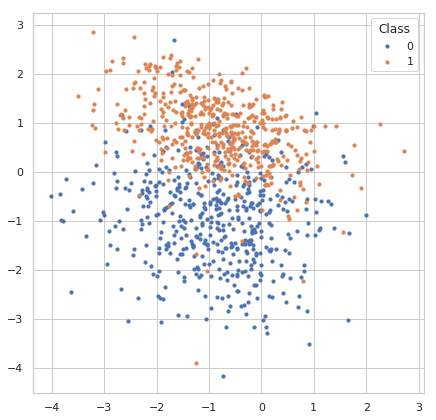

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))
for label in np.unique(y):
    ax.scatter(X[y == label, 0], X[y == label, 1], s=10, label=str(label))
ax.legend(title='Class')

### 回归问题数据集

我们也可以产生一个标签为连续值的可以用于回归问题的数据集

[make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)可以产生用于回归问题的数据集

下面的数据有1000个样本，有一个自变量和一个因变量（1 feature and 1 response variable）

Text(0,0.5,'y')

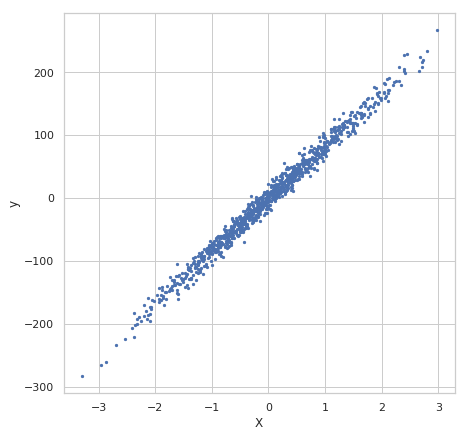

In [6]:
X, y = make_regression(n_samples=1000, n_features=1, n_informative=1, noise=10, random_state=random_state)
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0], y, s=5, label=str(label))
ax.set_xlabel('X')
ax.set_ylabel('y')

### 特定数据集

*scikit-learn* 也提供了一些特殊的数据集来做 分类、回归或者聚类 任务，比如：

[make_circles](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html), 
[make_moons](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html),
[make_gaussian_quantiles](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_gaussian_quantiles.html).

这些数据集通常是用于展示对于某些数据来说，线性的模型表现不佳，而非线性模型可以取得比较好的效果。

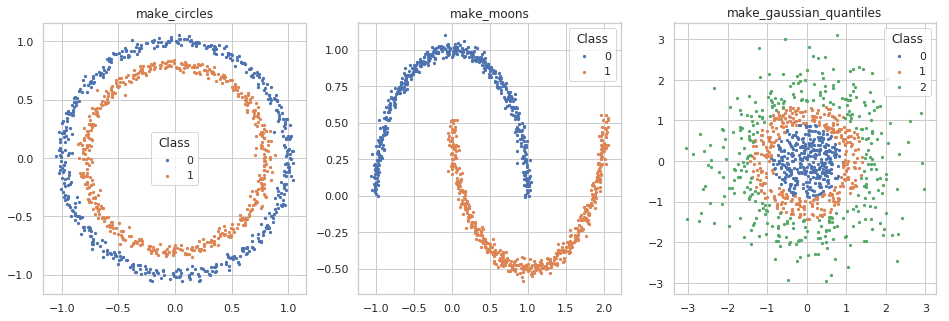

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, f in enumerate((make_circles, make_moons, make_gaussian_quantiles)):
    if f == make_gaussian_quantiles:
        X, y = f(n_samples=1000, random_state=random_state)
    else:
        X, y = f(n_samples=1000, noise=0.03,
                 random_state=random_state)
    for label in np.unique(y):
        axes[i].scatter(X[y == label, 0], X[y == label, 1], s=5, label=str(label))
    axes[i].legend(title='Class')
    axes[i].set_title(f.__name__)

### 本教程使用的数据集

我们用*sklearn.datasets.make_classification*产生了一个1000个样本， 四种feature，两类标签的数据集

In [8]:
X, y = make_classification(n_samples=1000, n_classes=2, n_features=4,
                           n_informative=2, n_redundant=0, n_clusters_per_class=1,
                           class_sep=0.9, random_state=random_state)
X.shape, y.shape

((1000, 4), (1000,))

## 单个特征分析

### 通过单个特征分析数据的可分性

我们可以绘制每个feature的分布，一个好的feature应该可以把样本的两个类别尽可能的分开

可以看到每个单独的feature都可以大致地将两个类别区分开

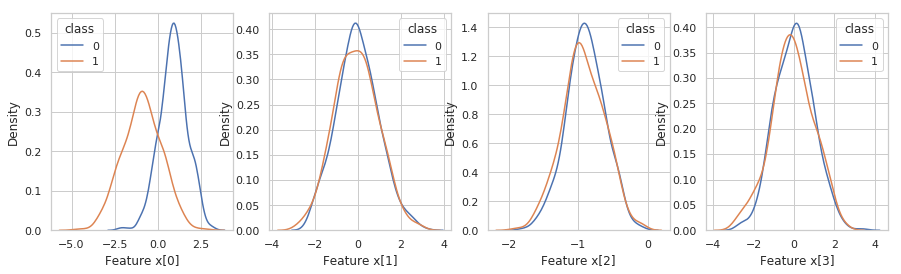

In [9]:
fig, axes = plt.subplots(1, X.shape[1], figsize=(15, 4))
for i in range(X.shape[1]):
    for label in (0, 1):
        sns.kdeplot(X[y == label, i], label=str(label), ax=axes[i])
    axes[i].legend(title='class')
    axes[i].set_xlabel('Feature x[{}]'.format(i))
    axes[i].set_ylabel('Density')

### Feature 相关性分析

有的时候，相关性很强的feature对模型是有害的，这些冗余的feature没有提供多余的信息，但是引入了更多的参数，导致模型更加容易[过拟合](https://www.zhihu.com/question/32246256)

虽然模型也有可能通过给予冗余feature更小的权重来削弱它们的影响，更好的做法总是提前发现这些冗余的feature并且去除/合并它们。

我们可以通过
- 计算它们的相关系数[PCC](https://zh.wikipedia.org/wiki/%E7%9A%AE%E5%B0%94%E9%80%8A%E7%A7%AF%E7%9F%A9%E7%9B%B8%E5%85%B3%E7%B3%BB%E6%95%B0)
- 绘制feature两两组合时样本的散点图

来观察feature的相关性

#### 计算feature两两间的pearson相关系数并绘制heatmap

In [10]:
pearson_correlation = np.ndarray([4,4])
for i in range(4):
    for j in range(4):
        pearson_correlation[i,j] = pearsonr(X[:,i],X[:,j])[0]

In [11]:
pearson_correlation

array([[ 1.        ,  0.05680514, -0.04066594,  0.04379145],
       [ 0.05680514,  1.        ,  0.0055519 , -0.00661222],
       [-0.04066594,  0.0055519 ,  1.        ,  0.04211491],
       [ 0.04379145, -0.00661222,  0.04211491,  1.        ]])

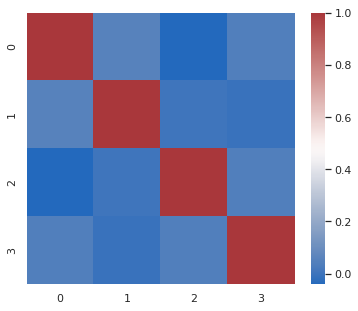

In [12]:
fig,ax=plt.subplots(figsize=(6,5))
sns.heatmap(pearson_correlation,cmap='vlag')

**可以看到feature之间的相关性都不强，相关性最大的是第一个feature和第三个feature，也只有0.47**

#### 绘制散点图
如果两个feature的散点图趋向于呈现为直线，则说明两个feature有较强的相关性，否则相关性较弱

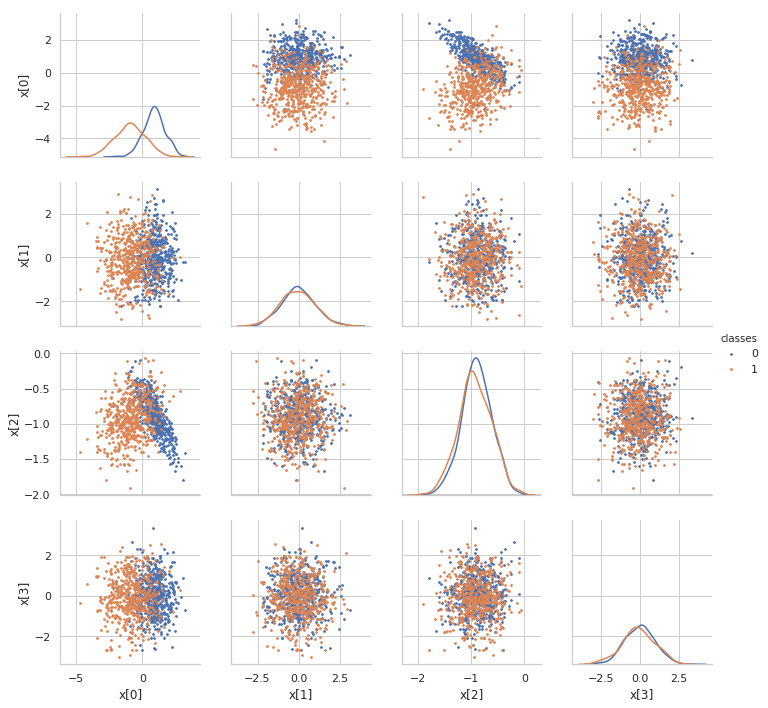

In [13]:
data = pd.DataFrame(X, columns=['x[{}]'.format(i) for i in range(X.shape[1])])
data.loc[:, 'classes'] = y.astype('U')
g = sns.PairGrid(data, hue='classes', vars=['x[{}]'.format(i) for i in range(X.shape[1])])
g.map_offdiag(plt.scatter, s=3)
g.map_diag(sns.kdeplot)
g.add_legend()

## 主成分分析（PCA）

具有3个以上feature的数据集无法直接通过2D plot展示。我们可以使用降维将数据嵌入2D空间。降维算法将高维数据点映射到低维的同时会尽可能的保持它们在原本空间中的距离。

主成分分析（PCA）是最常用的降维算法，它通过将原始特征线性组合将数据映射到新空间，并且保证：
- 新的特征彼此独立
- 总方差最大化
- 特征按方差从大到小排列

如果样本可以在PCA图中很好地分开，那么我们可以推断线性分类器也可以很好地实现对样本的分类。另外，对于线性不好分的样本，非线性分类器也许可以改善分类性能。

#### 通过PCA将将四维feature降至两维
第一张图展示了通过PCA变换后的四个feature对总方差的解释程度，我们总是挑选排在前两个的feature来可视化。可以看到前两维feature已经可以很好的区分样本，预示着一个线性的模型（它会像PCA一样对feature进行各种线性组合）也有潜力获得较好的分类效果。

Text(0,0.5,'PC2 (26.05%)')

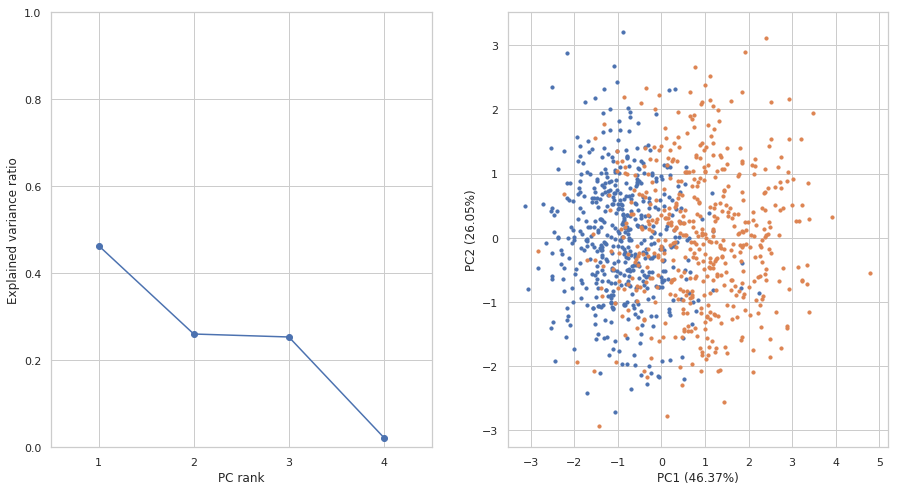

In [14]:
X_scaled = StandardScaler().fit_transform(X)  #对feature做normalization
pca = PCA()
X_pca = pca.fit_transform(X)
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].plot(np.arange(0.5, X.shape[1] + 0.5), pca.explained_variance_ratio_, marker='o')
axes[0].set_xticks(np.arange(0.5, X.shape[1] + 0.5))
axes[0].set_xticklabels(np.arange(1, X.shape[1] + 1))
axes[0].set_xlabel('PC rank')
axes[0].set_ylabel('Explained variance ratio')
axes[0].set_ylim(0, 1)
axes[0].set_xlim(0, X.shape[1])

for label in np.unique(y):
    axes[1].scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label, s=10)
axes[1].set_xlabel('PC1 ({:.02f}%)'.format(pca.explained_variance_ratio_[0]*100))
axes[1].set_ylabel('PC2 ({:.02f}%)'.format(pca.explained_variance_ratio_[1]*100))

## Data scaling

对于大多数机器学习算法，建议将feature scale到一个比较小的范围，以减少极端值的影响。

feature的规模过大或者过小都会增加数值不稳定的风险并且还使损失函数更加难以优化。
- 基于线性模型权重的特征选择方法会假定输入的feature在同样的规模上。
- 基于梯度下降算法的模型（比如神经网络）的表现和收敛速度会被没有合理scale的数据显著影响。
- 决策树和随机森林类算法对数据规模不太敏感，因为它们使用rule-based标准。

常见的数据缩放方法包括：
- standard/z-score scaling

Standard/z-score scaling first shift features to their centers(mean) and then divide by their standard deviation.
This method is suitable for most continous features of approximately Gaussian distribution.

$$ \text{zscore}(x_{ij}^{'}) = \frac{x_{ij} - \mu _{ij}}{\sigma _i} $$

- min-max scaling

Min-max scaling method scales data into range \[0, 1\].
This method is suitable for data concentrated within a range and preserves zero values for sparse data.
Min-max scaling is also sensitive to outliers in the data. Try removing outliers or clip data into
a range before scaling.

$$ \text{min_max}(x_{ij}^{'}) = \frac{x_{ij} - \text{min}_k \mathbf{x}_{ik}}
{\text{max}_k x_{ik} - \text{min}_k x_{ik}} $$


- abs-max scaling.

Max-abs scaling method is similar to min-max scaling, but scales data into range \[-1, 1\].
It does not shift/center the data and thus preserves signs (positive/negative) of features.
Like min-max, max-abs is sensitive to outliers.

$$ \text{max_abs}(x_{ij}^{'}) = \frac{x_{ij}}{\text{max}_k \vert x_{ik} \vert} $$

- robust scaling

Robust scaling method use robust statistics (median, interquartile range) instead of mean and standard deviation.
Median and IQR are less sensitive to outliers.
For features with large numbers of outliers or largely deviates from normal distribution, 
robust scaling is recommended.

$$ \text{robust_scale}(x_{ij}^{'}) = \frac{x_{ij} - \text{median}_k x_{ik}}
{Q_{0.75}(\mathbf{x}_i) - Q_{0.25}(\mathbf{x}_i)} $$

### 使用standard/z-score scaling 对数据做scaling
使用方法如下：

In [15]:
X = StandardScaler().fit_transform(X)

Text(0.5,1,'scaled data distribution by standard scaling')

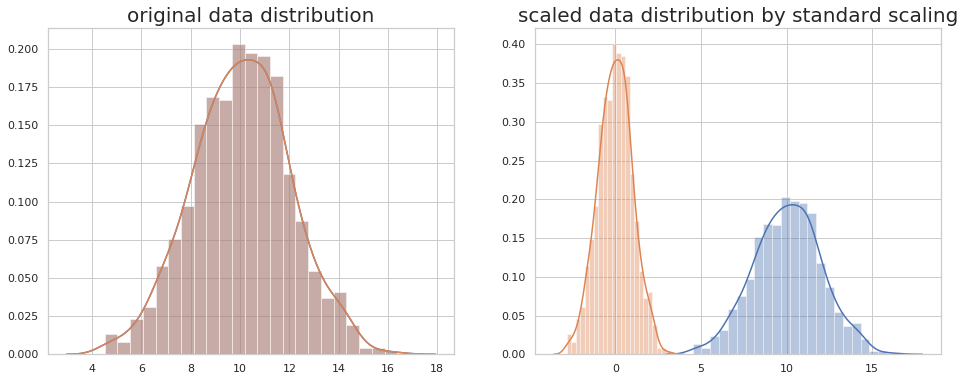

In [16]:
#产生模拟数据，1000个数据点，均值为10，标准差为2
x = random_state.normal(10, 2, size=1000)
fig, ax = plt.subplots(1,2,figsize=(16, 6))
sns.distplot(x, ax=ax[0])
sns.distplot(x, ax=ax[1])
sns.distplot(np.ravel(x), ax=ax[0])
sns.distplot(np.ravel(StandardScaler().fit_transform(x.reshape((-1, 1)))), ax=ax[1])
ax[0].set_title('original data distribution',fontsize=20)
ax[1].set_title('scaled data distribution by standard scaling',fontsize=20)

### 可视化四种scale方法对不同类型分布的scale效果
- 我们的四个feature采用四种分布产生：**Normal, Gamma, Poisson, Uniform**
- 我们使用四种scale的方法：**Standard, MinMax, MaxAbs, Robust**

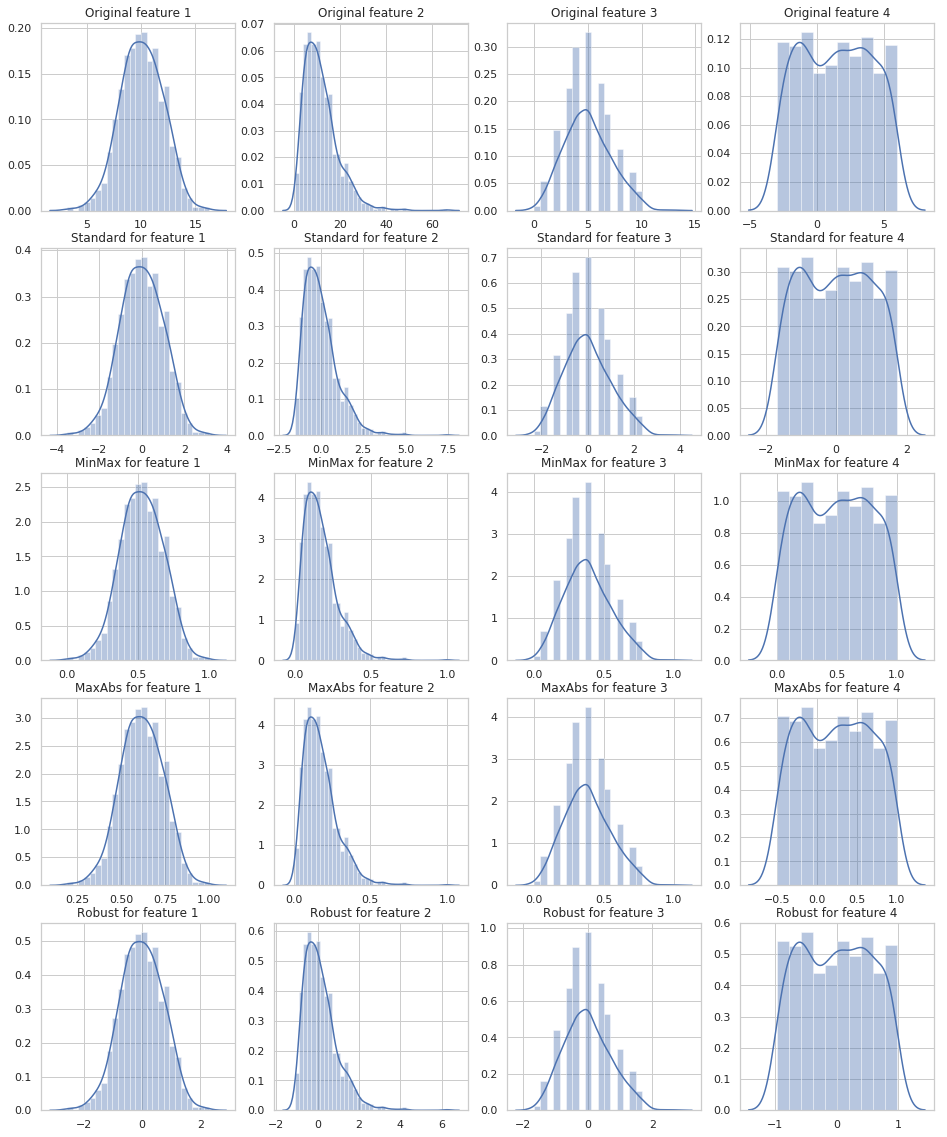

In [17]:
# Generate features with different distribution
x = np.zeros((1000, 4))
x[:, 0] = random_state.normal(10, 2, size=x.shape[0])
x[:, 1] = random_state.gamma(shape=3, scale=4, size=x.shape[0])
x[:, 2] = random_state.poisson(5, size=x.shape[0])
x[:, 3] = random_state.uniform(-3, 6, size=x.shape[0])

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
scalers = {
    'Standard': StandardScaler(),
    'MinMax': MinMaxScaler(),
    'MaxAbs': MaxAbsScaler(),
    'Robust': RobustScaler()
}
fig, axes = plt.subplots(5, x.shape[1], figsize=(16, 20))
for i in range(x.shape[1]):
    sns.distplot(x[:, i], ax=axes[0, i])
    axes[0, i].set_title('Original feature {}'.format(i + 1))
for j, scaler_name in enumerate(scalers.keys()):
    x_scaled = scalers[scaler_name].fit_transform(x)
    for i in range(x.shape[1]):
        sns.distplot(x_scaled[:, i], ax=axes[j + 1, i])
        axes[j + 1, i].set_title('{} for feature {}'.format(scaler_name, i + 1))

## 划分数据得到训练集和测试集（training set & test set）

到这里，我们已经对数据进行了一些分析，并且做了一些基本的预处理，接下来我们需要对数据进行划分，得到训练集和测试集，通过训练集中的数据训练模型，再通过测试集的数据评估模型的表现。

因为模型总是会在某种程度上过拟合训练数据，因此在训练数据上评估模型是有偏的，模型在训练集上的表现总会比测试集上好一些。

因为模型总是可以学到数据中隐藏的模式和分布，如果样本间彼此的差异比较大，过拟合问题就会得到一定程度的减轻。而如果数据的量比较大，模型在训练集和测试集上的表现差异就会减小。


这里我们使用[train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
方法来随机的将80%的样本设置为训练样本， 将其余20%设置为测试样本。


另一个常见的概念是验证集（validation set），通过将训练集再随机划分为训练集和验证集，进行多折交叉验证（[cross validation](https://www.zhihu.com/question/39259296)），可以帮助我们评估不同的模型，调整模型的超参数等，此外交叉验证在数据集较小的时候也被用于直接评估模型的表现，我们在交叉验证部分还会详细讲解。

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
print('number of training samples: {}, test samples: {}'.format(X_train.shape[0], X_test.shape[0]))

number of training samples: 800, test samples: 200


## 模型训练

在模型训练的过程中，模型内部的参数会调整以最小化[损失函数](http://www.csuldw.com/2016/03/26/2016-03-26-loss-function/)。

### 逻辑斯谛回归

逻辑斯谛回归是一个简单但是非常有效的模型，与它的名字不同，逻辑斯谛回归用于解决分类问题，在二分类问题中被广泛使用。对于二分类问题，我们需要对每一个样本预测它属于哪一类（0或者1）。

逻辑斯谛回归是一个线性分类模型，它会对输入的feature进行线性组合，然后将线性组合组合得到的值通过一个非线性的sigmoid函数映射为一个概率值(范围为0~1)。

模型训练过程中，模型内部的参数（线性模型的权重）会调整使得模型的损失函数（真实label和预测label的交叉熵）最小。

$$ p(y_i | \mathbf{x}_i) = \frac{1}{1 + \text{exp} \left( \sum_{j=1}^M x_{ij} w_{j} + b \right)} $$

#### 调用逻辑回归模型并且训练模型
使用sklearn封装好的模型进行模型的训练非常简单，以逻辑斯谛回归模型为例，只需要两行即可完成模型的训练。

我们使用默认参数进行训练。

In [19]:
model = LogisticRegression()
_ = model.fit(X_train, y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 模型分析

我们对训练好的模型进行一些分析，来进一步理解机器学习模型的原理。

### 特征重要性

对于线性模型（Logistic regression, linear regression, linear SVM）, 特征的重要性一般被定义为该特征对应的参数的平方：
$$ \text{FeatureImportance}_j = w_{j}^2 $$

用我们的训练集数据训练的逻辑斯谛回归模型内部得到的我们的四个特征的权重如下图所示，可以看到模型主要利用了第一个和第三个特征进行训练，给予了这两个特较大的重要性

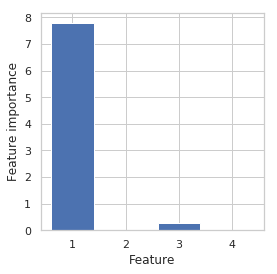

In [20]:
fig, ax = plt.subplots(figsize=(4, 4))
feature_importance = np.square(np.ravel(model.coef_))
ax.bar(np.arange(1, X.shape[1] + 1).astype('U'), feature_importance)
ax.set_xlabel('Feature')
_ = ax.set_ylabel('Feature importance')

### 决策边界（选读）

我们可以分析一下不同模型的决策边界，来进一步理解模型内部的原理。

我们首先绘制一副2D图像，图像上包含样本的散点图，以及模型的决策面，例如红色部分的区域表示模型认为所有落在该区域的的样本的class均为1。

可以看到逻辑斯谛回归的决策边界是直线，而其他的分类器的决策边界都是不规则的非线性曲线。

图中出现的分类模型包括：
- 逻辑斯谛回归
- 支持向量机
- 决策树
- K最近邻法
- 高斯过程分类器
- 随机森林分类器

读者不需要了解其具体原理，只需要会调用即可。

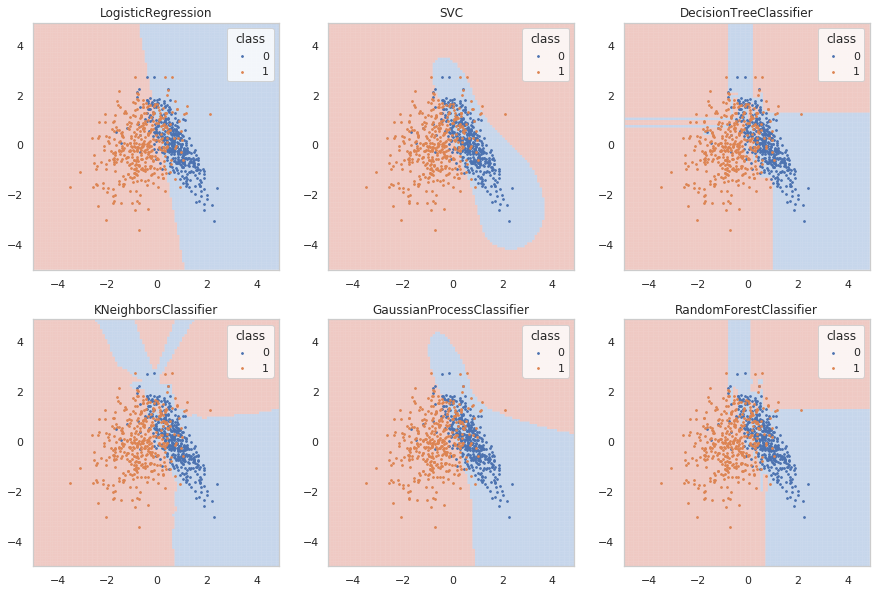

In [21]:
X_grid, Y_grid = np.mgrid[-5:5:0.1, -5:5:0.1]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

from matplotlib.colors import ListedColormap
cmap = sns.diverging_palette(252, 17, n=2)
cmap = ListedColormap(cmap)

# Use top 2 features
selected_features = np.argsort(-feature_importance)[:2]
for n, model_class in enumerate((LogisticRegression, SVC,
                                 DecisionTreeClassifier, KNeighborsClassifier,
                                 GaussianProcessClassifier, RandomForestClassifier)):
    i, j = n//3, n%3
    model_n = model_class()
    model_n.fit(X_train[:, selected_features], y_train)
    labels_grid = model_n.predict(np.column_stack([np.ravel(X_grid), np.ravel(Y_grid)]))
    
    axes[i, j].pcolor(X_grid, Y_grid, labels_grid.reshape(X_grid.shape), 
                          cmap=cmap, linewidth=0, edgecolor='face', alpha=0.3)
    axes[i, j].set_title(model_class.__name__)
    for label in np.unique(y):
        axes[i, j].scatter(X_train[y_train == label, selected_features[0]],
                           X_train[y_train == label, selected_features[1]],
                           s=3, label=str(label))
    axes[i, j].legend(title='class')

理解了决策边界的概念就可以进一步的理解机器学习的模型内部是如何起作用的，这里推荐感兴趣且的读者来[动手调整一个神经网络](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=6,5,5,4&seed=0.88851&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=regression&initZero=false&hideText=false)，来进一步理解不同的参数对一个复杂的模型（诸如神经网络）的决策边界的影响。

## 模型评估

### 在测试集上预测样本类别

为了评估模型表现，我们需要对测试集样本进行预测，我们使用*predict*方法来预测样本类别，它会返回一个整数型array来表示不同的样本类别。

In [22]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0])

### Confusion matrix

最常用的评估分类模型表现的方法是构建一个[confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

Confusion matrix会总结模型正确和错误分类的样本数量，并将预测的样本分成如下四类： 

|  | Predicted|Negative | Positive |
| --------- | |-------- | -------- |
|   **True**   |  |         |          |
| **Negative**  | |True Negative (TN) | False Negative (FN) |
| **Positive**  | |False Positive (FP) | True Positive (TP) |

#### 构建预测结果的Confusion matrix
使用scikit-learn的confusion_matrix方法即可得到模型预测结果的confusion matrix

In [23]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=pd.Series(['Negative', 'Positive'], name='Predicted'),
             index=pd.Series(['Negative', 'Positive'], name='True'))

Predicted,Negative,Positive
True,,
Negative,81,8
Positive,27,84


### 分类问题的评估指标



通过confusion matrix中的四个数据(TP, TN, FP, FN)可以得到一系列相应的评估分类问题的指标：

- **Accuracy (0 ~ 1)** 

summarizes both positive and negative predictions, but is biased if the classes are imbalanced:
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

- **Recall/sensitivity (0 ~ 1)**

summarizes how well the model finds out positive samples:
$$\text{Recall/Sensitivity} = \frac{TP}{TP + FN}$$

- **Precision/positive predictive value (0 ~ 1)** 

summarizes how well the model finds out negative samples:
$$\text{Precision/Positive Predictive Value} = \frac{TP}{TP + FP}$$

- **F1 score (0 ~ 1)** 

balances between positive predictive value (PPV) and true positive rate (TPR) and is more suitable for
imbalanced dataset:
$$\text{F1 score} = 2 \frac{PPV \cdot TPR}{PPV + TPR}$$

- **Matthews correlation coefficient (MCC) (-1 ~ 1)** 

another metric that balances between recall and precision:
$$\text{MCC} = \frac{TP \times TN - FP \times FN}
{(TP + FN)(TP + FP)(TN + FP)(TN + FN)}$$

In [24]:
scorers = {'accuracy': accuracy_score,
           'recall': recall_score,
           'precision': precision_score,
           'f1': f1_score,
           'mcc': matthews_corrcoef
}
for metric in scorers.keys():
    print('{} = {}'.format(metric, scorers[metric](y_test, y_pred)))

accuracy = 0.825
recall = 0.7567567567567568
precision = 0.9130434782608695
f1 = 0.8275862068965518
mcc = 0.6649535460625479


### 类别预测概率

虽然样本的类别是离散值，但是对于每个样本，模型首先会对每一个可能的类别预测一个连续的概率值，再通过一个固定的cutoff（对于概率值来说，可以是0.5）来把连续值转化为离散值来得到样本的类别。模型对每个样本预测出的连续值可以看做模型预测时的confidence/probability。如果模型对其中一个类别的confidence/probability接近1，则认为模型有很强烈的倾向认为样本属于该类别，如果模型对两个类别的confidence/probability都比较接近0.5，说明模型有较大的不确信度。

通过*predict_proba*可以得到原始的预测值。

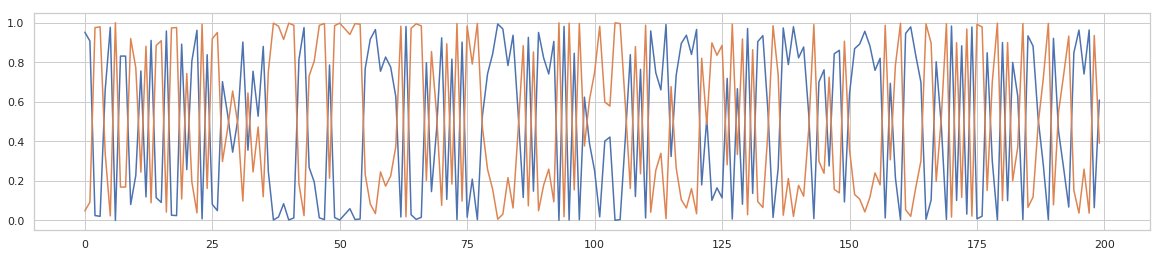

In [25]:
y_score = model.predict_proba(X_test)
fig,ax=plt.subplots(figsize=(20,4))
ax.plot(y_score)

我们可以发现，对于200个测试样本中的大多数样本，模型都有较强的confidence/probability认为样本应该属于某个类别。

### ROC曲线和Precision-Recall曲线

有时，一个固定的cutoff不足以评估模型性能。
Receiver Operating Characterisic（ROC）曲线和Precision-Recall曲线可以通过不同的cutoff评估模型的表现。 ROC曲线和Precision-Recall对于类别不平衡问题也有比较好的评估。与ROC曲线相比，recision-Recall曲线更适合类别极不平衡的数据集。

ROC曲线下面积（AUROC）或average precision (AP)是一个单值，它总结了不同截止值下的模型平均表现，常常用于报告模型的分类表现。

#### 绘制ROC曲线和Precision-Recall曲线
我们使用sklearn自带的*roc_curve*和*precision_recall_curve*方法来计算绘图需要的指标，这两个方法需要的输入为测试集每个样本的真实标签和模型预测的每个样本的概率。

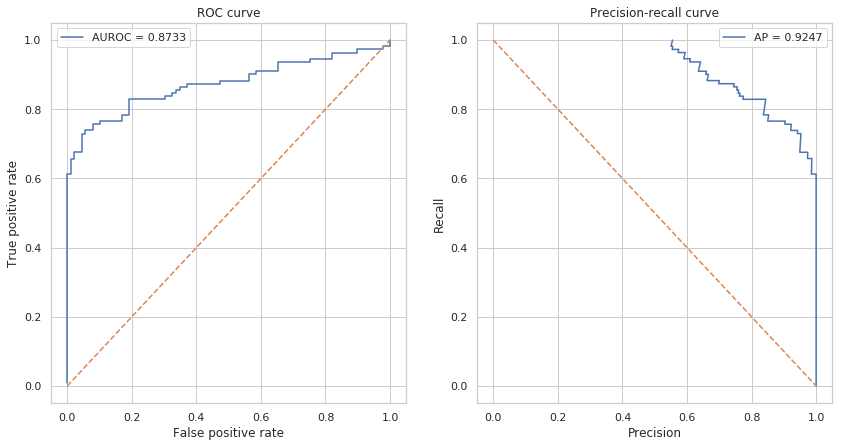

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
ax = axes[0]
ax.plot(fpr, tpr, label='AUROC = {:.4f}'.format(roc_auc_score(y_test, y_score[:, 1])))
ax.plot([0, 1], [0, 1], linestyle='dashed')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax.set_title('ROC curve')
ax.legend()
# predision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:, 1])
ax = axes[1]
ax.plot(precision, recall, label='AP = {:.4f}'.format(average_precision_score(y_test, y_score[:, 1])))
ax.plot([0, 1], [1, 0], linestyle='dashed')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision-recall curve')
ax.legend()

可以看到AUROC和AP都接近于1，可以认为模型的分类效果很好。

## 交叉验证

交叉验证可以被用于在训练集中再随机划分出一部分验证集用于挑选模型的参数，也可以用于直接评估模型的表现。

对于非常大的数据集，将数据集单独拆分为训练集和测试集就足够来评估模型性能。但是，对于小型数据集，测试样本仅代表一小部分未来预测中可能的样本，即对于小数据集，划分出的测试集可能因为样本数过少而不具有代表性。


### K折（k-folds）交叉验证

交叉验证是小型数据集模型评估的常用技术。
在**k折交叉验证**中，数据集被均匀地划分为*k*个部分（folds）。
在每轮验证中，模型在一个fold上进行测试，并在剩余的*（k-1）/ k *部分上进行训练。 

K折交叉验证确保训练样本和测试样本之间没有重叠，K轮结束后，每个样本会被设置为测试样品一次。最后，模型平均表现是在* k*轮次中计算的。



*scikit-learn*提供很多功能来[划分数据集]
(http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection).

这里我们使用[KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
来将数据集划分为10折，5和10是交叉验证中经常使用的折数。如果样本数量和计算资源允许，一般设置为10折。

下面的代码展示*KFold*是如何划分数据集的，图片中每一行为一个轮次，每一行中黑色的box为该轮次的测试集

Text(0.5,0,'Sample')

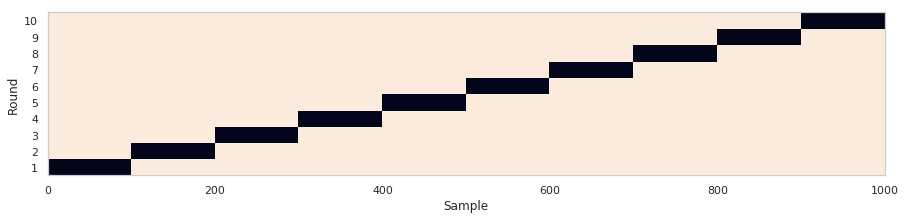

In [28]:
n_splits = 10

kfold = KFold(n_splits=n_splits, random_state=random_state)
is_train = np.zeros((n_splits, X.shape[0]), dtype=np.bool)
for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
    is_train[i, train_index] = 1

fig, ax = plt.subplots(figsize=(15, 3))
ax.pcolormesh(is_train)
ax.set_yticks(np.arange(n_splits) + 0.5)
ax.set_yticklabels(np.arange(n_splits) + 1)
ax.set_ylabel('Round')
ax.set_xlabel('Sample')

接下来我们在训练集上训练模型，并且对整个数据集进行预测，这样我们可以分析模型在10折交叉验证中每一轮时在训练集和测试集分别的表现。

In [29]:
predictions = np.zeros((n_splits, X.shape[0]), dtype=np.int32)
predicted_scores = np.zeros((n_splits, X.shape[0]))

for i in range(n_splits):
    model.fit(X[is_train[i]], y[is_train[i]])
    predictions[i] = model.predict(X)
    predicted_scores[i] = model.predict_proba(X)[:, 1]

### Collect evaluation metrics

我们统计了模型10折交叉验证的指标

In [30]:
cv_metrics = pd.DataFrame(np.zeros((n_splits*2, len(scorers) + 2)),
                          columns=list(scorers.keys()) + ['roc_auc', 'average_precision'])
cv_metrics.loc[:, 'dataset'] = np.empty(n_splits*2, dtype='U')
for i in range(n_splits):
    for metric in scorers.keys():
        cv_metrics.loc[i*2 + 0, metric] = scorers[metric](y[is_train[i]], predictions[i, is_train[i]])
        cv_metrics.loc[i*2 + 1, metric] = scorers[metric](y[~is_train[i]], predictions[i, ~is_train[i]])
    cv_metrics.loc[i*2 + 0, 'roc_auc'] = roc_auc_score(y[is_train[i]], predicted_scores[i, is_train[i]])
    cv_metrics.loc[i*2 + 1, 'roc_auc'] = roc_auc_score(y[~is_train[i]], predicted_scores[i, ~is_train[i]])
    cv_metrics.loc[i*2 + 0, 'average_precision'] = average_precision_score(y[is_train[i]], 
                                                                           predicted_scores[i, is_train[i]])
    cv_metrics.loc[i*2 + 1, 'average_precision'] = average_precision_score(y[~is_train[i]], 
                                                                           predicted_scores[i, ~is_train[i]])
    cv_metrics.loc[i*2 + 0, 'dataset'] = 'train'
    cv_metrics.loc[i*2 + 1, 'dataset'] = 'test'

cv_metrics

,accuracy,recall,precision,f1,mcc,roc_auc,average_precision,dataset
0,0.832222,0.797386,0.863208,0.828992,0.666847,0.908640,0.931433,train
1,0.810000,0.809524,0.755556,0.781609,0.614965,0.882184,0.844361,test
2,0.818889,0.781737,0.843750,0.811561,0.639439,0.898143,0.915890,train
3,0.900000,0.961538,0.862069,0.909091,0.804601,0.985176,0.988980,test
4,0.828889,0.796909,0.853428,0.824201,0.659380,0.905196,0.924640,train
5,0.830000,0.770833,0.860465,0.813187,0.661438,0.918269,0.919381,test
6,0.837778,0.800443,0.865707,0.831797,0.677544,0.906804,0.925267,train
7,0.850000,0.740000,0.948718,0.831461,0.717581,0.887600,0.922607,test
8,0.841111,0.797327,0.873171,0.833527,0.684737,0.906587,0.924899,train
9,0.790000,0.788462,0.803922,0.796117,0.579780,0.901042,0.925304,test


### 总结评估指标

我们评估多轮交叉验证的平均指标如下：

In [31]:
cv_metrics_mean = cv_metrics.groupby('dataset').mean()
cv_metrics_mean

,accuracy,recall,precision,f1,mcc,roc_auc,average_precision
dataset,,,,,,,
test,0.831000,0.794919,0.861380,0.823425,0.667898,0.903903,0.921943
train,0.833778,0.795302,0.862274,0.827428,0.669625,0.906041,0.924631


接下来我们绘制散点图来展示模型七个指标：*accuracy,recall,precision,f1,mcc,roc_auc,average_precision*分别在十折交叉验证中的值：

Text(0.5,1,'Model performance using 10-fold cross-validation')

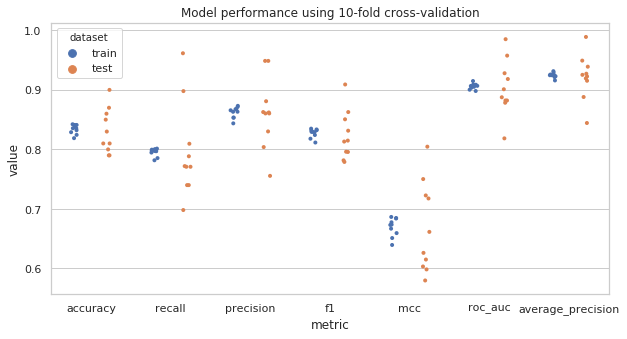

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_data = pd.melt(cv_metrics, id_vars=['dataset'], var_name='metric', value_name='value')
sns.stripplot(x='metric', y='value', hue='dataset', 
              dodge=True, jitter=True, data=plot_data, size=4, ax=ax)
#sns.pointplot(x='metric', y='value', hue='dataset', data=plot_data, markers="d", 
#              join=False, ci=None, ax=ax, dodge=True, palette='dark')
ax.set_title('Model performance using 10-fold cross-validation')

### ROC 和 PR 曲线

对每一轮交叉验证结果，我们都可以绘制一条ROC/PR曲线，当我们把十条曲线绘制在一起时，更好的方法是绘制十轮结果的均值曲线，以及用阴影区域表示十轮结果的置信区间。

> tips: Anaconda并没有集成seaborn的最新版本，如果运行代码时报错，请使用pip更新seaborn：`pip install seaborn==0.9.0`

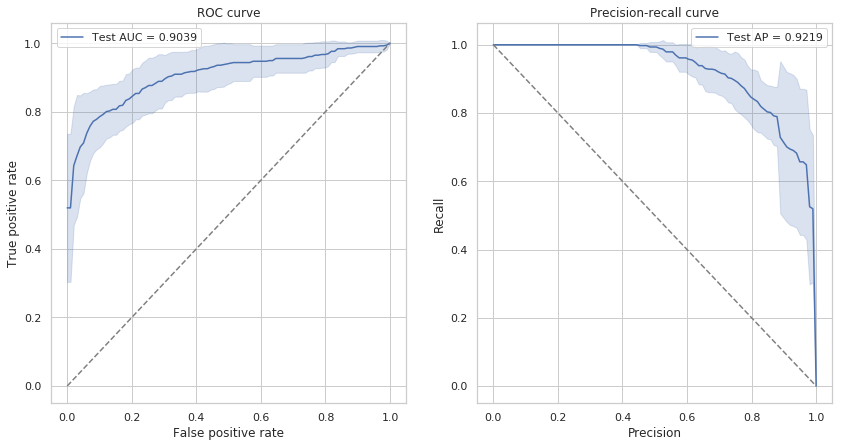

In [33]:
from scipy import interp

fig, axes = plt.subplots(1, 2, figsize=(14, 7))
# ROC curve
ax = axes[0]
all_fprs = np.linspace(0, 1, 100)
roc_curves = np.zeros((n_splits, len(all_fprs), 2))
for i in range(n_splits):
    fpr, tpr, thresholds = roc_curve(y[~is_train[i]], predicted_scores[i, ~is_train[i]])
    roc_curves[i, :, 0] = all_fprs
    roc_curves[i, :, 1] = interp(all_fprs, fpr, tpr)
roc_curves = pd.DataFrame(roc_curves.reshape((-1, 2)), columns=['fpr', 'tpr'])
sns.lineplot(x='fpr', y='tpr', data=roc_curves, ci='sd', ax=ax,
             label='Test AUC = {:.4f}'.format(cv_metrics_mean.loc['test', 'roc_auc']))
#ax.plot(fpr, tpr, label='ROAUC = {:.4f}'.format(roc_auc_score(y_test, y_score[:, 1])))
#ax.plot([0, 1], [0, 1], linestyle='dashed')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax.plot([0, 1], [0, 1], linestyle='dashed', color='gray')
ax.set_title('ROC curve')
ax.legend()

# predision-recall curve
ax = axes[1]
all_precs = np.linspace(0, 1, 100)
pr_curves = np.zeros((n_splits, len(all_precs), 2))
for i in range(n_splits):
    fpr, tpr, thresholds = precision_recall_curve(y[~is_train[i]], predicted_scores[i, ~is_train[i]])
    pr_curves[i, :, 0] = all_precs
    pr_curves[i, :, 1] = interp(all_precs, fpr, tpr)
pr_curves = pd.DataFrame(pr_curves.reshape((-1, 2)), columns=['precision', 'recall'])
sns.lineplot(x='precision', y='recall', data=pr_curves, ci='sd', ax=ax,
             label='Test AP = {:.4f}'.format(cv_metrics_mean.loc['test', 'average_precision']))

ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.plot([0, 1], [1, 0], linestyle='dashed', color='gray')
ax.set_title('Precision-recall curve')
ax.legend()

## Homework

1. 理解并且运行教程中的代码，你也可以重新生成数据集，或者使用真实的数据集。

2. 使用教程中已有的代码，用不同的分类器 (SVC, random forest, logistic regression, KNN) 训练并进行预测。比较模型的表现。汇报accuracy, recall,precision,f1,mcc,roc_auc等指标。尝试绘制ROC曲线。

3. （选做）在做交叉验证时使用不同的K值，比较模型的表现。

4. （选做）修改样本的类别比例，在类别不均衡数据上比较模型的表现。

## Further reading
[**Recommendation tutorial**](https://lulab.gitbook.io/training/part-iii.-advanced-bioinfo-analyses/1.machine-learning-basics)

### 书籍

1. Trevor Hastie, Robert Tibshirani, Jerome Friedman. (2009). The Elements of Statistical Learning. 
2. Christopher Bishop. (2006). Pattern Recognition and Machine Learning.
3. Kevin P. Murphy. (2012). Machine Learning A Probabilisitic Perspective.
4. Sergios Theodoridis. (2009). Pattern Recognition.

### 类别不平衡问题

1. He, H., and Garcia, E.A. (2009). Learning from Imbalanced Data. IEEE Transactions on Knowledge and Data Engineering 21, 1263–1284.
2. Batista, G.E.A.P.A., Prati, R.C., and Monard, M.C. (2004). A Study of the Behavior of Several Methods for Balancing Machine Learning Training Data. SIGKDD Explor. Newsl. 6, 20–29.
3. Chawla, N.V., Bowyer, K.W., Hall, L.O., and Kegelmeyer, W.P. (2002). SMOTE: Synthetic Minority Over-sampling Technique. J. Artif. Int. Res. 16, 321–357.

### Machine learning in R

The *caret* package (a tutorial in GitBook): [http://topepo.github.io/caret](http://topepo.github.io/caret)